In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadSimpData():
    """
    创建单层决策树的数据集
    Parameters:
        无
    Returns:
        dataMat - 数据矩阵
        classLabels - 数据标签
    """
    datMat = np.matrix([[ 1. ,  2.1],
        [ 1.5,  1.6],
        [ 1.3,  1. ],
        [ 1. ,  1. ],
        [ 2. ,  1. ]])
    classLabels = [1.0, 1.0, -1.0, -1.0, 1.0]
    return datMat,classLabels

In [3]:
def showDataSet(dataMat, labelMat):
    """
    数据可视化
    Parameters:
        dataMat - 数据矩阵
        labelMat - 数据标签
    Returns:
        无
    """
    data_plus = []          #正样本
    data_minus = []         #负样本
    for i in range(len(dataMat)):
        if labelMat[i] > 0:
            data_plus.append(dataMat[i])
        else:
            data_minus.append(dataMat[i])
    data_plus_np = np.array(data_plus)      #转换为numpy矩阵
    data_minus_np = np.array(data_minus)    #转换为numpy矩阵
    plt.scatter(np.transpose(data_plus_np)[0], np.transpose(data_plus_np)[1])  #正样本散点图
    plt.scatter(np.transpose(data_minus_np)[0], np.transpose(data_minus_np)[1]) #负样本散点图
    plt.show()

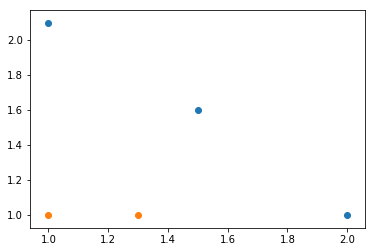

In [4]:
if __name__ == '__main__':
    dataArr,classLabels = loadSimpData()
    showDataSet(dataArr,classLabels)

In [5]:
#测试是否有某个值小于或大于我们正在测试的阈值
def stumpClassify(dataMatrix,dimen,threshVal,threshIneq):
    """
    单层决策树分类函数
    Parameters:
        dataMatrix - 数据矩阵
        dimen - 第dimen列，也就是第几个特征
        threshVal - 阈值
        threshIneq - 标志
    Returns:
        retArray - 分类结果
    """
    retArray = np.ones((np.shape(dataMatrix)[0],1)) #初始化retArray为1
    if threshIneq == 'lt':
        retArray[dataMatrix[:,dimen] <= threshVal] = -1.0  #如果小于阈值,则赋值为-1
    else:
        retArray[dataMatrix[:,dimen] > threshVal] = -1.0   #如果大于阈值,则赋值为-1
    return retArray

In [6]:
#
def buildStump(dataArr,classLabels,D):
    """
    找到数据集上最佳的单层决策树
    Parameters:
        dataArr - 数据矩阵
        classLabels - 数据标签
        D - 样本权重
    Returns:
        bestStump - 最佳单层决策树信息
        minError - 最小误差
        bestClasEst - 最佳的分类结果
    """
    dataMatrix = np.mat(dataArr); labelMat = np.mat(classLabels).T
    m,n = np.shape(dataMatrix)
    numSteps = 10.0; bestStump = {}; bestClasEst = np.mat(np.zeros((m,1)))
    minError = float('inf') #最小误差初始化为正无穷大
    for i in range(n):  #遍历所有特征
        rangeMin = dataMatrix[:,i].min(); rangeMax = dataMatrix[:,i].max() #找到特征中最小的值和最大值
        stepSize = (rangeMax - rangeMin) / numSteps #计算步长
        for j in range(-1, int(numSteps) + 1): #对每个步长                                    
            for inequal in ['lt', 'gt']:#大于和小于的情况，均遍历。lt:less than，gt:greater than
                threshVal = (rangeMin + float(j) * stepSize) #计算阈值
                predictedVals = stumpClassify(dataMatrix, i, threshVal, inequal)#计算分类结果
                errArr = np.mat(np.ones((m,1))) #初始化误差矩阵为全一
                errArr[predictedVals == labelMat] = 0   #分类正确的,赋值为0
                weightedError = D.T * errArr     #计算误差
                print("split: dim %d, thresh %.2f, thresh ineqal: %s, the weighted error is %.3f" % (i, threshVal, inequal, weightedError))
                if weightedError < minError:    #找到误差最小的分类方式
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump,minError,bestClasEst

In [7]:
if __name__ == '__main__':
    dataArr,classLabels = loadSimpData()
    D = np.mat(np.ones((5, 1)) / 5)
    bestStump,minError,bestClasEst = buildStump(dataArr,classLabels,D)
    print('bestStump:\n', bestStump)
    print('minError:\n', minError)
    print('bestClasEst:\n', bestClasEst)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.50, thresh ineq